
##### Dataset Description: 
- Record Date	
- Country	
- Currency	
- Country - Currency Description	
- Exchange Rate	
- Effective Date	
-Source Line Number	
- Fiscal Year	
- Calendar Year	
- ....


##### Download Instructions: 

[Dataset URL](https://fiscaldata.treasury.gov/datasets/treasury-reporting-rates-exchange/treasury-reporting-rates-of-exchange)
- open the link and download the CSV file

##### Analysis 
1. To see the trend of USD conversion rate of $1 to the equivalent 1 unit denomination of every South Asian country since the year 2003.
- to know how the economies compare across South Asian countries since dollar price say a lot about how well a country is doing financially.
2. To see the mean USD conversion rate of $1 to the equivalent 1 unit denomination of every country with exchange rate less than 1/80.
-  to know how well USD compares with the stronger currencies assuming $1 = 80 units of any given country is the cutoff.
- knowing how the relatively stronger curriencies did compared to USD can say how well USD is actually doing.


In [157]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [158]:
# loading the data
df = pd.read_csv('data.csv')

df

,Record Date,Country,Currency,Country - Currency Description,Exchange Rate,Effective Date,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
0,2021-12-31,Afghanistan,Afghani,Afghanistan-Afghani,103.400,2021-12-31,1.0,2022.0,1.0,2021.0,4.0,12.0,31.0
1,2021-12-31,Afghanistan,Afghani,Afghanistan-Afghani,91.390,2022-02-15,2.0,2022.0,1.0,2021.0,4.0,12.0,31.0
2,2021-12-31,Albania,Lek,Albania-Lek,105.950,2021-12-31,3.0,2022.0,1.0,2021.0,4.0,12.0,31.0
3,2021-12-31,Algeria,Dinar,Algeria-Dinar,138.284,2021-12-31,4.0,2022.0,1.0,2021.0,4.0,12.0,31.0
4,2021-12-31,Angola,Kwanza,Angola-Kwanza,562.440,2021-12-31,5.0,2022.0,1.0,2021.0,4.0,12.0,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15741,2001-03-31,Vietnam,Dong,Vietnam-Dong,14562.000,NaN,178.0,2001.0,2.0,2001.0,1.0,3.0,31.0
15742,2001-03-31,Western Samoa,Tala,Western Samoa-Tala,3.280,NaN,179.0,2001.0,2.0,2001.0,1.0,3.0,31.0
15743,2001-03-31,Yemen,Rial,Yemen-Rial,165.000,NaN,180.0,2001.0,2.0,2001.0,1.0,3.0,31.0
15744,2001-03-31,Zambia,Kwacha,Zambia-Kwacha,3520.000,NaN,181.0,2001.0,2.0,2001.0,1.0,3.0,31.0


In [159]:
# using pd.describe() to get a overview of the data
df.describe()

,Exchange Rate,Source Line Number,Fiscal Year,Fiscal Quarter Number,Calendar Year,Calendar Quarter Number,Calendar Month Number,Calendar Day Number
count,1.574500e+04,15745.000000,15745.000000,15745.000000,15744.000000,15744.000000,15744.000000,15744.000000
mean,2.204903e+06,94.347602,2011.165957,2.501937,2011.042746,2.503176,7.509527,30.500445
std,1.250092e+08,54.328313,17.112666,1.142707,6.042168,1.118463,3.355388,0.500016
min,0.000000e+00,1.000000,3.000000,1.000000,2001.000000,1.000000,3.000000,30.000000
25%,1.780000e+00,47.000000,2006.000000,1.000000,2006.000000,2.000000,6.000000,30.000000
50%,1.348800e+01,94.000000,2011.000000,2.000000,2011.000000,3.000000,9.000000,31.000000
75%,3.070600e+02,141.000000,2017.000000,4.000000,2016.000000,4.000000,12.000000,31.000000
max,8.310000e+09,199.000000,2022.000000,31.000000,2021.000000,4.000000,12.000000,31.000000


In [160]:
# printing the columns
df.columns

Index(['Record Date', 'Country', 'Currency', 'Country - Currency Description',
       'Exchange Rate', 'Effective Date', 'Source Line Number', 'Fiscal Year',
       'Fiscal Quarter Number', 'Calendar Year', 'Calendar Quarter Number',
       'Calendar Month Number', 'Calendar Day Number'],
      dtype='object')

In [167]:
# printing the index
df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            14280, 14281, 14282, 14283, 14284, 14285, 14286, 14287, 14288,
            14289],
           dtype='int64', length=14290)

In [168]:
#preprocessing
df = df[df['Calendar Year'] >= 2003]
df['Currency'] = df['Currency'].str.lower()
df['Country'] = df['Country'].str.lower()

In [163]:
# groupby Country, Currency and Calendar Year
group = df.groupby(['Country', 'Currency', 'Calendar Year'])['Exchange Rate'].agg([ np.min, np.mean, np.max]).round(2)
group = group.reset_index(level=['Currency'])
group

Currency   amin   mean    amax
Country     Calendar Year                               
afghanistan 2003.0         afghani  40.30  46.70   49.25
            2004.0         afghani  45.21  49.61   57.69
            2005.0         afghani  45.21  46.48   50.30
            2006.0         afghani  50.30  50.30   50.30
            2007.0         afghani  49.53  49.98   50.30
...                            ...    ...    ...     ...
zimbabwe    2013.0            rtgs   1.00   1.00    1.00
            2014.0            rtgs   1.00   1.00    1.00
            2019.0            rtgs   6.38  12.44   16.28
            2020.0            rtgs  25.16  62.78   81.44
            2021.0            rtgs  81.87  95.37  120.92

[3675 rows x 4 columns]

In [164]:
group_pt =  pd.pivot_table(group, values='mean', index=["Calendar Year"], columns=["Country"])
group_pt

Country,afghanistan,albania,algeria,angola,antigua,antigua & barbuda,argentina,armenia,australia,austria,...,united kingdom,uruguay,uzbekistan,vanuatu,venezuela,vietnam,western samoa,yemen,zambia,zimbabwe
Calendar Year,,,,,,,,,,,,,,,,,,,,,
2003.0,46.70,116.64,77.08,72.99,NaN,2.7,2.98,579.70,1.50,0.860,...,0.600,28.11,987.00,119.85,1.600000e+03,15525.25,2.87,183.00,4662.500,3.942750e+03
2004.0,49.61,102.62,72.18,83.22,NaN,2.7,2.94,531.00,1.36,0.795,...,0.540,28.17,1024.25,111.55,1.977500e+03,15744.50,2.70,184.25,4672.500,5.528030e+03
2005.0,46.48,99.90,72.96,86.37,NaN,2.7,2.94,466.69,1.32,3.590,...,0.550,24.29,1110.50,108.91,2.150000e+03,15857.00,2.63,191.25,4183.750,3.690550e+04
2006.0,50.30,96.90,71.50,80.25,NaN,2.7,3.08,410.00,1.31,6.375,...,0.540,24.02,1228.75,107.73,2.150000e+03,15985.00,2.67,196.75,3750.000,4.421837e+04
2007.0,49.98,89.20,68.22,75.00,NaN,2.7,3.11,333.25,1.16,6.340,...,0.500,23.26,1270.75,95.45,1.613040e+03,16106.00,2.46,198.50,3923.750,5.541930e+06
2008.0,47.30,91.50,66.86,75.00,NaN,2.7,3.29,320.00,1.34,6.320,...,0.600,22.25,1339.00,101.66,2.150000e+00,16542.75,2.62,199.00,4348.750,7.540000e+09
2009.0,48.42,95.73,71.51,75.00,NaN,2.7,3.75,370.00,1.19,0.720,...,0.610,21.46,1487.00,100.47,2.150000e+00,17868.00,2.65,202.50,4843.750,6.000000e+09
2010.0,46.02,106.87,73.27,90.00,NaN,2.7,3.93,372.50,1.08,0.780,...,0.650,20.24,1610.50,96.27,3.020000e+00,19270.00,2.39,218.75,4916.250,1.000000e+00
2011.0,46.42,101.87,73.18,93.75,NaN,2.7,4.15,371.25,0.98,0.730,...,0.630,19.30,1740.25,90.91,3.450000e+00,20550.00,2.22,217.00,4867.500,1.000000e+00


Text(0.5, 1.0, 'USD to South Asian Currency conversion rates')

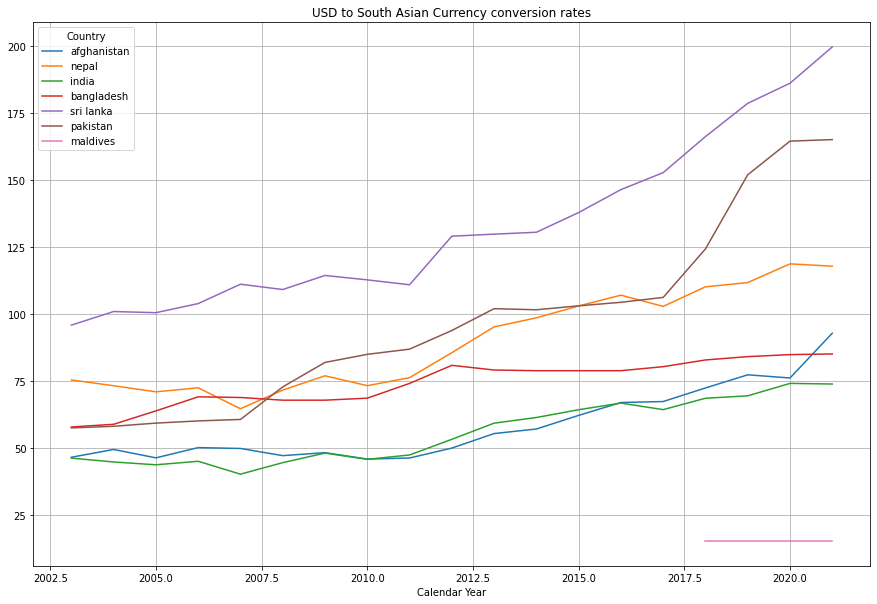

In [165]:
group_pt[['afghanistan','nepal', 'india','bangladesh', 'sri lanka', 'pakistan', 'maldives']].plot(figsize=(15,10))
plt.grid()
plt.title("USD to South Asian Currency conversion rates")

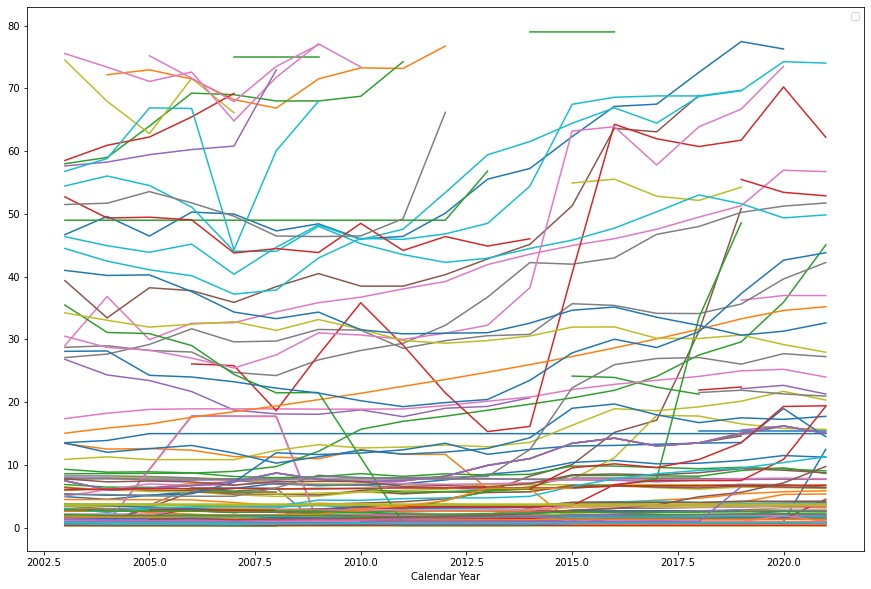

In [166]:
below_fhund = group[group['amax'] < 80 ]
below_fhund =  pd.pivot_table(below_fhund, values='mean', index=["Calendar Year"], columns=["Country"])
below_fhund.plot(figsize=(15,10))
plt.legend([])

##### Discussion:

1. From the first plot
- We can see that Sri Lanka always had the highest dollar price since 2003 and the Indian and Maldives(although there is no data for all the years) currency is the cheapest. If we compare the prices among South Asia, Sri Lanka probably has the most depreciated US dollar price because of its recent monetary policies, high inflation rates and greater political instability among the South Asian countries.

2. From the second plot 
- We can see that the value of the US currency slightly decreased in the period 2005 to 2010 during the Great Recession in the countries with lower conversion rates(since they are the stronger economies). Since then the value of USD has been increasing in most of the countries which shows that the USD became stronger over the years after the recession.
